# Algorithms and Preparing Data for ML

## 1.0 Introduction to Algoritms

Relax. There's no special voodoo magic involved to creating algorithms. Even the most advanced, sophisticated algorithms in the world all follow the same basic process.

## 1.1 What is an algorithm?

An algorithm is nothing more than a step by step process for completing a task, solving a problem, or achieving a goal.

Everday examples:
- cooking recipes
- personal habits (getting dressed)
- cultural traditions (table manners)
- driving laws

Let's psuedo-code an algorithm right now:

def get_dressed(temp):

    if temp > 30:
        put_on(shorts)
    else:
        put_on(pants)

Here's a 'get dressed' algorithm that takes in temperate, does some math/applies some logic, and knows how to get dressed.

## 1.2 Algorithm Use Cases

Algorithms can be used in any case with:
- logic that can be systematically expressed (though not necessarily mathematically)
- Any system with <100% uncertainty (pure chance/luck based situations can not be modelled)

Algorithms are especially good in cases with:
- large number of calculations
- high dimensional complexity
- a process which needs a high degree of consistency

Algorithms DO NOT require:
- finite possibilities/data sets
- situations with only one 'right' or 'best' solution
- fully known enviornments/data sets
- problems humans already know how to solve (but humans must be able to systematically express the question to be asked)

## 1.3 Let's Create an Algorithm Right Now...

So that we don't keep worrying that 'algorithms' must be so complex we can't possibly understand them, let's create an algorithm right now.

Let's create a list of steps/processes to create an algorithm which can play tic-tac-toe.

if (board is empty):

    move(corner_spot)
else:

    if ():
        move()

<img src="https://i.pinimg.com/736x/2c/c2/44/2cc244543dac1719085e901b97b18794--game-boards-board-games.jpg" alt="Smiley face" height="" width="">

Other things we might consider:
- If opponent is about to win (2 in a row and a blank space) move to block them
- If we can win (2 in a row and a blank space) move to win
- Imagine playing in each possible space and calculate the quality of this new board position... repeat, pick best move
- It's just tic-tac-toe (don't need to be precise since not high impact), when in doubt choose randomly

This psuedo-coding process is incredibly helpful, instead of trying to 1) code out logic and 2) remember programming syntax at the same time, even expert developers benefit from first laying out the logic, and then after logic flows are complete, then worry about expressing the logic in Python syntax.

Also consider:
- quantify the goodness of a move (e.g. 1 = good move, -1 = bad move)

## 2.0 Using Algorithms to Analyze Simple Datasets

Now that we know what algorithms are and how to create them, let's look at a simple example and build the entire algorithm- from importing the data all the way up to using the outputs of our model.

In this example, we will create an algorithm to predict housing prices based on 2 metrics- sq_feet (size) and quality.


## 2.1 Import Data
As with everything, first we must import dependencies and data:

In [4]:
import pandas as pd
housing = pd.read_csv('housing_prices.csv')

# Price and sq_feet are exactly what they sound like, and you can think of quality as an integer rating between 1-100
housing.head()

,price,sq_feet,quality
0,30992.64,718,38
1,21187.60,601,30
2,47161.68,896,41
3,15338.82,421,19
4,29759.07,551,49


## 2.2 Clean and Prepare Data

After we import data, what is ALWAYS our next step?
Hint: It's a pain in the butt and composes 90% of what using machine learning in the real world actually is? And it's right above in the section title!

That's right! Data cleaning.

Let's clean our data, and since we'll be regularly importing data, let's make it a function to easily re-use it!

In [5]:
def clean(df):
    # Drop any rows with na values
    df = df.dropna(how='any')
    # Convert any columns that are secretly hiding as strings when they should be numbers, into numbers
    df.apply(pd.to_numeric, errors='ignore')
    return df

# Remember all we did above is define the function, we still have to actually run/call it for it to execute
clean(housing).head()

,price,sq_feet,quality
0,30992.64,718,38
1,21187.60,601,30
2,47161.68,896,41
3,15338.82,421,19
4,29759.07,551,49


## 2.3 Manually Explore the Data - Generate a Hypothesis to Test

This step may seem highly manual and not-automated... and that's because it is! Even the cuttined edge AI and machine learning algorithms can't determine WHY to look at the data and (outside of limited cases) WHAT to look for.

To do machine learning, we must first practice looking at data and postulating insights from the relationships.

In this case, let's imagine we are a realtor, and we want to ensure we know which price to set houses at. List too high, and we'll lose money having the house sit around a long time until its sold. List too low, and we'll lost money that we could have earned from buyers.

So, how do we begin going about predicting price given sq_feet (size) and quality?

We should begin by looking at how variables relate:
- All else equal, as sq_feet increases, what do we expect to happen to price?
- All else equal, as quality increases, what do we expect to happen to price?

Are our expectations correct?

In [6]:
# Import matplotlib and seaborn for charts
import matplotlib.pyplot as plt
import seaborn as sns

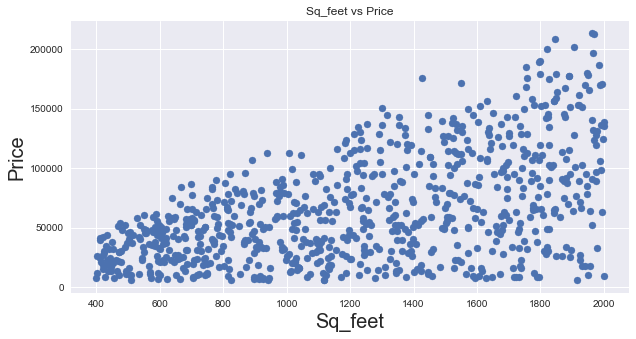

In [7]:
# Let's do some data exploration to examine our initial hypotheses
plt.figure(figsize=(10,5))
plt.scatter(housing['sq_feet'],housing['price'])
plt.xlabel('Sq_feet', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('Sq_feet vs Price')
plt.show()

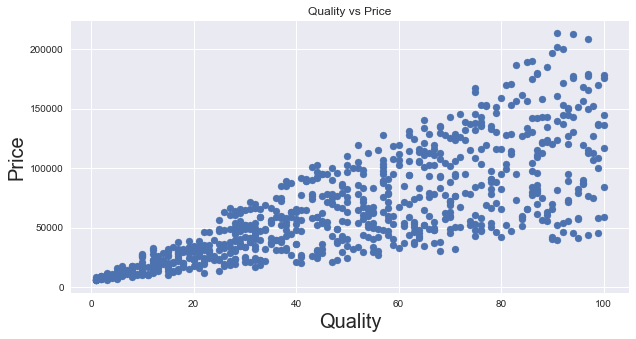

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(housing['quality'],housing['price'])
plt.xlabel('Quality', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('Quality vs Price')
plt.show()

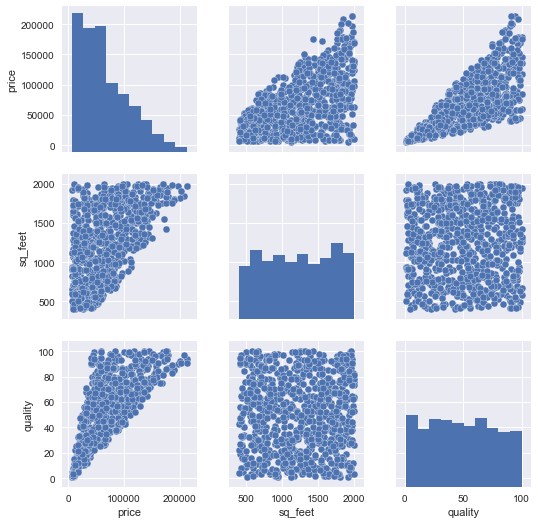

In [11]:
# Or to save time, we can just plot all relationships at once with seaborn
import seaborn as sns
sns.set(style="darkgrid")
sns.pairplot(housing)
plt.savefig('pairplot.png')
plt.show()

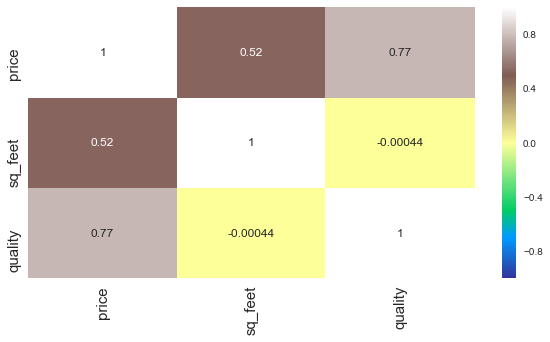

In [12]:
# And let's look at correlations
correlations_map= housing.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlations_map,annot=True,cbar=True,cmap="terrain")
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

What have we learned from the above exploration?
- Both sq_feet and quality are decently positively correlated with price
- Sq_feet and quality are NOT correlated with each other: remember, correlation is not inherently transitive

How would we use this information to predict housing prices? Well we have two complications:

- Complication #1: We need to relate a metric such as 'sq_feet' to a metric of 'price' but they have completely different units. Comparing them 1:1 doesn't make any sense. How can we generally express on an apples-to-apples basis how a given number of sq_feet relates to a certain price?

- Complication #2: At the end of the day, we are trying to predict one single value (price) using more than one input(sq_feet and quality). How do we do this? If we only use one or the other, we're missing out on the entire set of information. We need to figure out a way to combine them to account for both and predict only one number. In other words, we need to squash the impact size has on price together with the impact quality has on price to output a single prediction.

### Complication #1 - Comparing Units of Sq_feet to units of Price

How do we figure out a general way to relate '1 unit of sq_feet' to 'X units of price'?

What we need is a standard measurement so we have some way to compare 'number of sq_feet' to 'dollars of price' in a way that retain the fundamental relationships in the data.

For instance instead of asking:
- Given I have a house of 2000 sq_feet, how many dollars is that worth?

What if we could ask:
- Given I have a house that is 90% the size of the largest house, what relative price does that indicate? A house 50% of the most expensive? A house 80% of the most expensive?

We have consistent units now right? In other words, we can now ask 'How does an above average sized house relate to an above average priced house?' instead of worrying about exact conversions between different units.

This is called normilization, or standardization, since we are literally created a normalized set of figures, and this solves Complication #1.

### Complication #2 - Combine sq_feet and quality impact to predict Price

We'll look at solving this one a bit later, for now just keep it in the back of your mind.

## 2.4 Normalizing Our Data

There are many possible ways to normalize/standardize data, but one of the simplest and most useful (even for advanced situations) is called 'feature scaling'.

Essentially, all feature scaling does is express each value in the data set as relative to its distribution, where the lowest value in the set would have a value of 0, and the highest value in the set a value of 1.

To do this then we need to find:
- the total range of data (the range from min to max)
- how much above the min each data point is (since this determines where it falls in the range)

Confused? Let's look at a specific example.


Pretend we're working with a data set of prices which range from 300 to 700, our total range of prices is 400 (700-300):
- A 650 price is 350 above the minimum (650 - 300), which is 87.5% of the range (350/400)
- A 300 price is 0 above the minimum (300 - 300), which is 0% of the range (0/400)
- A 700 price is 400 above the minium (700 -300), which is 100% of the range (400/400)

Thus the scaled/normalized/standardized values for each would be:
- 650: .875
- 300: 0
- 700: 1

In [19]:
# So let's normalize our data, EXACTLY in the same way we just did above:
# (x - min) / (max - min)

maximum = housing['price'].max()
minimum = housing['price'].min()

price_range = maximum - minimum

housing_normalized = pd.DataFrame({})
housing_normalized['price'] = housing['price']

housing_normalized['price'] = housing['price'].apply(lambda x: (x - minimum) / price_range)

def convert(x):
    return (x - minimum) / price_range

housing_normalized['price'] = housing['price'].apply(convert)

# We've now normalized the price column
housing_normalized.head()

,price
0,0.122065
1,0.074800
2,0.200007
3,0.046607
4,0.116119


In [20]:
# Pandas allows this be done in a much easier way though, normalizing all columns at once...

# Start over, with brand new pandas dataframe and set to housing dataframe
housing_normalized = pd.DataFrame({})

# We use a 'deep copy' because otherwise setting two pandas dataframes equal to each other,
# Creates two references to the same object. Ie. imagine A and B are pandas dataframes
# If A = df, and we say B = A, B and A both refer to the df dataframe, so if we change A or B it changes df
# Here we want to change B WITHOUT changing the underlying df or its storage in A, so we create a copy
housing_normalized = housing.copy(deep=True)

# For each value, subtract out the minimum value from its own column (Pandas is smart enough to not cross columns)
housing_normalized -= housing_normalized.min()

# Now we need to divide by the range within each column (max - min)
housing_normalized /= housing_normalized.max() - housing_normalized.min()

# You'll notice the results for price are the same as above, but we do every column at once this way!
housing_normalized.head()

,price,sq_feet,quality
0,0.122065,0.198874,0.373737
1,0.074800,0.125704,0.292929
2,0.200007,0.310194,0.404040
3,0.046607,0.013133,0.181818
4,0.116119,0.094434,0.484848


In [21]:
# Let's make this a function, because we are going to be regularly normalizing things
# We can save time in the long run by creating a function and calling it, rather than repeating ourselves

# takes in a pandas Dataframe and uses EXACT same syntax as we just used above
def normalize(df):
    df_norm = df
    df_norm -= df_norm.min()
    df_norm /= df_norm.max() - df_norm.min()
    return df_norm
    
# Let's test that our function works by calling it on our housing dataframe and comparing values
# Remeber we need to create a copy if we want to keep our original 'housing' df unchanged
test = housing.copy(deep=True)
normalize(test).head()

,price,sq_feet,quality
0,0.122065,0.198874,0.373737
1,0.074800,0.125704,0.292929
2,0.200007,0.310194,0.404040
3,0.046607,0.013133,0.181818
4,0.116119,0.094434,0.484848


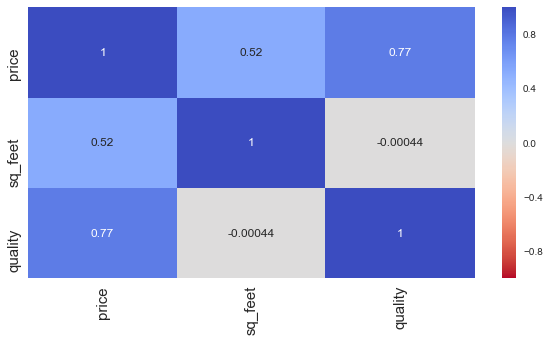

In [22]:
# Now we have normalized values, let's just also do a double check to make sure the relationships still hold true
correlations_map= housing_normalized.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlations_map,annot=True,cbar=True,cmap="coolwarm_r")
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

As you can see normalizing didn't change the relationships in the data, all it did was allow us to now compare across variables/columns on an apples-to-apples basis.

#### Recap our algorithm so far:

1. Import data
2. Clean data, function: clean(df)
3. Manually explore the data
4. Normalize data, function: normalize(df)

Next, we need to generate a prediction.

## 2.5 Building Our Prediction Model

For now let's keep it simply and use just one variable.

Quality is more highly correlated with price than sq_feet is (.77 vs .52), so let's use 'quality'.

Now that we've normalized values, let's take a look at how our normalized 'Quality' values relate to our normalized 'Price' values.

Note: this is standard, typically you would do some data exploration first on non-normalized data to understand how the raw datatset is structured and how it needs to be cleaned, then after normalizing you might do additional exploration for actually looking at modelling specific relationships.

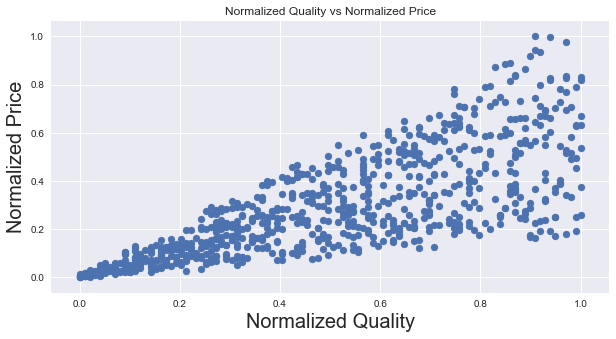

In [23]:
# Normalized data exploration
plt.figure(figsize=(10,5))
plt.scatter(housing_normalized['quality'],housing_normalized['price'])
plt.xlabel('Normalized Quality', fontsize=20)
plt.ylabel('Normalized Price', fontsize=20)
plt.title('Normalized Quality vs Normalized Price')
plt.show()

The relationship between 'Normalized Quality' and 'Normalized Price' looks pretty linear! Just eyeballing it looks like at:

- 0.0 quality, average price is 0.0
- 0.4 quality, average price is about 0.2
- 0.8 quality, average price is about 0.4
- 1.0 quality, average price is about 0.5

From this, it seems we can be fairly accurate simply by predicting that on average:
- price = .5 * quality

In [24]:
# Let's add our prediction step to our algorithm
housing_normalized['predicted_price'] = .5 * housing_normalized['quality']

# Looking at the results, that doesn't seem so bad...
housing_normalized.head()

,price,sq_feet,quality,predicted_price
0,0.122065,0.198874,0.373737,0.186869
1,0.074800,0.125704,0.292929,0.146465
2,0.200007,0.310194,0.404040,0.202020
3,0.046607,0.013133,0.181818,0.090909
4,0.116119,0.094434,0.484848,0.242424


But it's hard to tell just trying one thing right?

What we're going to do is keep tweaking our prediction model over and over to try and improve it...

What do we use when we need to re-use code but want to keep it in just one place for easy maintenance?

FA-FA-FA-FUNCTION!!! YEEEEAAAAH!!!
https://www.youtube.com/watch?v=7uW47jWLMiY

In [25]:
# Create our model as a function
def predict(df):
    df['predicted_price'] = .5 * df['quality']
    return df

predict(housing_normalized).head()

,price,sq_feet,quality,predicted_price
0,0.122065,0.198874,0.373737,0.186869
1,0.074800,0.125704,0.292929,0.146465
2,0.200007,0.310194,0.404040,0.202020
3,0.046607,0.013133,0.181818,0.090909
4,0.116119,0.094434,0.484848,0.242424


#### Recap, our algorithm so far:

1. Import data
2. Clean data, function: clean(df)
3. Manually explore the data
4. Normalize data, function: normalize(df)
5. Generate a prediction, function: predict(df)

Next we need to improve our prediction model, and to improve our model we first need to know how right or wrong our model is. In other words, we need to evaluate the quality of our prediction model.

## 2.6 Evaluate our Predictions

One popular way to quantify prediction quality is to calculate the average amount we were off by.

The better the model, the better it will predict each point average, thus the less we should be off by on average.


So to calcuate average error:
- For every row, we can calculate: predicted_price - actual price
- Sum these up in every row to get total error
- And divide by the number of rows, to get average error

But wait...

What happens when we have two estimates:
- Calc: predicted - actual
- #1 120 - 100 = +20
- #2 80 - 100 = -20
- +20 + (-20) = 0 total error

0 total error!?! It looks like our predictions were perfect, but they weren't, we just had overestimates and underestimates cancel each other out.

One way to avoid this is to square each term, so that we always have positive numbers:

- Calc: (predicted - actual)^2
- (120 - 100)^2 = 400
- (80 - 100)^2 = 400
- +400 + (+400) = 800 total squared error

<br>
<br>
So, to summarize to calculate error we want to:
- For every row, we can calculate: predicted_price - actual price
- Square this value
- Sum these squared values up in every row to get total squared error
- And divide by the number of rows, to get average squared error

This is actually a very common method of calculating error called 'Mean Squared Error':
https://en.wikipedia.org/wiki/Mean_squared_error

While not the only method, it remains very common for its practicality and ease of use

In [26]:
# Let's calculate our mean-square-error, per the EXACT calculation we just did above
housing_normalized['error'] = (housing_normalized['predicted_price'] - housing_normalized['price']) ** 2
print(housing_normalized['error'].sum())
housing_normalized.head()

16.528115105626686


,price,sq_feet,quality,predicted_price,error
0,0.122065,0.198874,0.373737,0.186869,0.004200
1,0.074800,0.125704,0.292929,0.146465,0.005136
2,0.200007,0.310194,0.404040,0.202020,0.000004
3,0.046607,0.013133,0.181818,0.090909,0.001963
4,0.116119,0.094434,0.484848,0.242424,0.015953


Hmm, calculating error seems like something we'll want to do each time make a prediction...

Guess it's time to...

FUNCTIONIZEEEEEEEE!!!!

https://www.myinstants.com/instant/yeah/

In [27]:
# Create a mean-squared-error function
def MSE(df):
    df['error'] = (df['predicted_price'] - df['price']) ** 2
    return df['error'].sum()

### Recap, our algorithm so far:
1. Import data
2. Clean data, function: clean(df)
3. Manually explore the data
4. Normalize data, function: normalize(df)
5. Generate a prediction, function: predict(df)
6. Calculate error, function: MSE(df)

But wait...

As we just generated, our first predicted price is '0.186869' and our total error was '16.528', but what does that mean? 16.5 what? Dollars? Feet? Tacos?

How can we use normalized predictions in the real world?

We calculated our error on normalized values relating to percentage of ranges. This is ok for the purposes of comparing if one error is higher than another (ie a model with an error of 500 is less accurate than one with 100), but these values don't tie back or relate to anything we can really interpret.

To generate useful predictions we can interpret, and more useful error terms that tell us 'how many dollars (units of price) were we off by?', we need to de-normalize.

In other words, we need to reverse the normilization process, essentially convert predicted price and actual price back from normalized values to actual dollar amounts, so that our predictions and error are in dollars.

Normalizing was just algebra:
- norm_x = (x - min) / (max - min)

To reverse it, we just isolate the variable x and do the same algebra is reverse:
- norm_x * (max - min) = (x - min)
- (norm_x * (max - min)) + min = x
- Remember though that max and min here are referring the NON-NORMALIZED population of x's.

It seems like if we want to normalize regularly, we would also want to denormalize regularly, so maybe we need a...

FUCNTIIOOOOOON!

https://media.giphy.com/media/l0NwNNlcEm3l4noNq/giphy.gif

In [28]:
def denormalize(norm_df, df):
    x = ( norm_df['predicted_price'] * ( df['price'].max() - df['price'].min() ) ) + df['price'].min()
    norm_df = ( norm_df * ( df.max() - df.min() ) ) + df.min()
    norm_df['predicted_price'] = x
    return norm_df

# Let's test
predict_housing = denormalize(housing_normalized, housing)
predict_housing.head()

,error,predicted_price,price,quality,sq_feet
0,NaN,44436.123131,30992.64,38.0,718.0
1,NaN,36054.323535,21187.60,30.0,601.0
2,NaN,47579.297980,47161.68,41.0,896.0
3,NaN,24529.349091,15338.82,19.0,421.0
4,NaN,55961.097576,29759.07,49.0,551.0


In [29]:
# Compare to original non-normalized values
housing.head()

,price,sq_feet,quality
0,30992.64,718,38
1,21187.60,601,30
2,47161.68,896,41
3,15338.82,421,19
4,29759.07,551,49


In [30]:
# Now we can calculate the error, which will now be in same units as price column (squared)
print(MSE(predict_housing))

predict_housing.head()

711292584495.1014


,error,predicted_price,price,quality,sq_feet
0,1.807272e+08,44436.123131,30992.64,38.0,718.0
1,2.210195e+08,36054.323535,21187.60,30.0,601.0
2,1.744048e+05,47579.297980,47161.68,41.0,896.0
3,8.446582e+07,24529.349091,15338.82,19.0,421.0
4,6.865462e+08,55961.097576,29759.07,49.0,551.0


### Recap, our algorithm so far:
1. Import data
2. Clean data, function: clean(df)
3. Manually explore the data
4. Normalize data, function: normalize(df)
5. Generate a prediction, function: predict(df)
6. Denormalize data, function: denormalize(norm_df, df)
7. Calculate error, function: MSE(df)

##### Congratulations, we've succesfully written an algorithm (from scratch) to take in housing data and predicts housing prices!

Now let's try and make it more accurate. If you remember, earlier had two complications:

- Complication #1: We need to relate a metric such as 'sq_feet' to a metric of 'price' but they have completely different units. We solved this with normalization.

- Complication #2: At the end of the day, we are trying to predict one single value (price) using more than one input(sq_feet and quality). How do we do this? If we only use one or the other, we're missing out on the entire set of information. We need to figure out a way to combine them to account for both and predict only one number. In other words, we need to squash the impact size has on price together with the impact quality has on price to output a single prediction.

We still need to solve this second problem if we want to make our model more accurate...

## 3.0 Improving Algorithm Predictions by Analyzing Multiple Variables


To solve complication #2, we need to consider both 'sq_feet' and 'quality'. There are two possible ways to approach this:
1. We can look at each variable's impact on price seperately, then update our prediction model to combine these impacts.
2. We can do the reverse- we can combine these variables into one variable, and then build a prediction model with this new combined variable.

## 3.1 Modeling Impact of Multiple Variables

For now, let's just worry about the first option. Earlier we saw how quality seemed to relate to price, so now let's look at how size does...

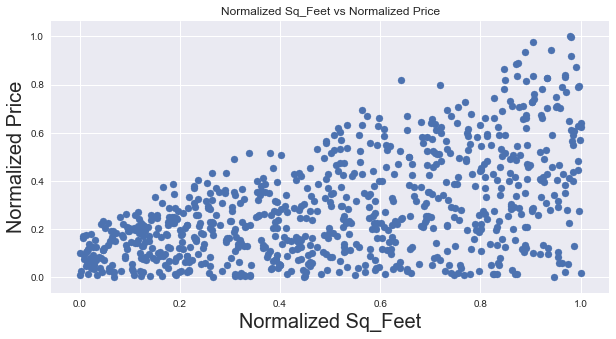

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(housing_normalized['sq_feet'],housing_normalized['price'])
plt.xlabel('Normalized Sq_Feet', fontsize=20)
plt.ylabel('Normalized Price', fontsize=20)
plt.title('Normalized Sq_Feet vs Normalized Price')
plt.show()

This also looks pretty linear. Just eyeballing it looks like at:

- 0.0 sq_feet, average price is 0.05
- 0.4 sq_feet, average price is about 0.25
- 0.6 quality, average price is about 0.35
- 1.0 quality, average price is about 0.55

From this, it seems that we can say that on average:
- price = (.5 * sq_feet) +.05

So now we have two predicting variables/relationships:
1. price = .5 & quality
2. price = (.5 * sq_feet) +.05

How do we combine them? We have a few options
- Add them together: in this case though we'll be account for 2x the price. In other words, if each equation predicts 100% of final price, adding them together would predict 200% of the price. So we could add them together and divide by 2...
- Which would be equivalent to our second option, take the average of them. In other words, seperately use sq_feet to predict price, then seperately use quality to predict price, then take the average of these predictions.
- A third option is a weighted average. A plain average is in essence saying each factor (sq_feet and quality) are equally important in predicting price which may not be true.

For now though, let's just take the simple/plain average.

Let's update our model for these changes and see how accurate we are.

In [32]:
def predict(df):
    df['predicted_price'] = ( (.5 * df['quality']) + ( (.5 * df['sq_feet']) +.05 ) ) / 2
    return df

predict(housing_normalized)
housing_normalized.head()

,price,sq_feet,quality,predicted_price,error
0,0.122065,0.198874,0.373737,0.168153,0.004200
1,0.074800,0.125704,0.292929,0.129658,0.005136
2,0.200007,0.310194,0.404040,0.203559,0.000004
3,0.046607,0.013133,0.181818,0.073738,0.001963
4,0.116119,0.094434,0.484848,0.169821,0.015953


In [33]:
# Now that we've predicted, just as before we need to then denormalize and then calculate error
predict_housing = denormalize(housing_normalized, housing)
predict_housing.head()

,error,predicted_price,price,quality,sq_feet
0,NaN,40553.545394,30992.64,38.0,718.0
1,NaN,32567.836937,21187.60,30.0,601.0
2,NaN,47898.431461,47161.68,41.0,896.0
3,NaN,20967.182548,15338.82,19.0,421.0
4,NaN,40899.510856,29759.07,49.0,551.0


In [34]:
# Now calculate error
print(MSE(predict_housing))

# Our error from before, minus new MSE:
print(711292584495.1014 - MSE(predict_housing))

562328961854.6001
148963622640.50134


##### First error (only quality): 711,292,584,495 (711 billion)

Second error (avg quality and price): 562,328,961,854 (562 billion)

Wow, our model improved! Ok, but is it a good assumption that price and quality are equally important?

When we looked at correlation, 'quality' was .77 correlated with price, while 'sq_feet' was only .52 correlated... maybe we should weigh our prediction model by these correlations to more heavily weigh quality, since it seems to be the better predictor of price.

In [35]:
# weighted average (weighted by correlation)
def predict(df):
    df['predicted_price'] = ( ((.5 * df['quality']) * .77) + ( ((.5 * df['sq_feet']) +.05 ) *.52 ) ) / (.77 + .52)
    return df

predict(housing_normalized)
housing_normalized.head()

,price,sq_feet,quality,predicted_price,error
0,0.122065,0.198874,0.373737,0.171780,0.004200
1,0.074800,0.125704,0.292929,0.132915,0.005136
2,0.200007,0.310194,0.404040,0.203260,0.000004
3,0.046607,0.013133,0.181818,0.077066,0.001963
4,0.116119,0.094434,0.484848,0.183891,0.015953


In [36]:
predict_housing = denormalize(housing_normalized, housing)
predict_housing.head()

,error,predicted_price,price,quality,sq_feet
0,NaN,41305.982940,30992.64,38.0,718.0
1,NaN,33243.512635,21187.60,30.0,601.0
2,NaN,47836.583887,47161.68,41.0,896.0
3,NaN,21657.524901,15338.82,19.0,421.0
4,NaN,43818.423011,29759.07,49.0,551.0


In [37]:
print(MSE(predict_housing))

# Our error from before, minus new MSE:
print(562328961854.6001 - MSE(predict_housing))

529337593438.45966
32991368416.14044


First error (only quality): 711,292,584,495 (711 billion)

Second error (avg quality and price): 562,328,961,854 (526 billion)

Third error (weighted avg quality and price): 529,337,593,438 (529 billion)

Our model improved again!

But what if we try the second method to use both a) price and b) quality to predict price.

## 3.2 Combining Variables and Dimensionality Reduction

Until now, we've always looked at each variable's impact on price seperately. All our graphs (and correlations) have all been in 2-dimensions, one for price and the other for a single predicting variable.

We could try and get more fancy and create 3D charts... but not only does that make insights and relationships very hard to read, it also only buys us one extra dimension, we can't go and create a 4D chart...

But what if we first combined two variables (sq_feet and quality) into one variable, then measured it's impact?

In other words, instead of a difficult/impossible visualization of multiple variables predicting one output, what if we first combined multiple variables into one variable, then graphed its relationship with one output- thats just a 2D chart, but were representing with it more than 2 variables (3- price, sq_feet, and quantity).

This is a form of dimensionality reduction. We take our 2 dimenions (size and quality) and reduce to one (sizequality).

https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/

How we interpret this value gets a bit subjective/difficult to understand, and largely depends on their relationship, but in this case you can think of it as 'quality weighted size' ie each unit of size matters more if its higher quality (or size weighted quality if you prefer).

Adding/subtracting variables to combine them doesn't work, since units of size can't be added to units of quality. But multiplying/dividing works because it creates a new holistic unit. For instance if we had an additional column of 'sq_feet of yard' we might add this to sq_feet of the house to combine them into one dimension.

So, while we could get fancy in adjusting how we weight each, let's just start with the simplest example...

https://www.youtube.com/watch?v=wVXrvnHrW70

In [38]:
# Combining variables into one new unit we'll call 'qualityfeet'

housing['qualityfeet'] = housing['sq_feet'] * housing['quality'] 
housing.head()

,price,sq_feet,quality,qualityfeet
0,30992.64,718,38,27284
1,21187.60,601,30,18030
2,47161.68,896,41,36736
3,15338.82,421,19,7999
4,29759.07,551,49,26999


In [39]:
# Now we normalize, just as before... nothing has changed in our process except we've combined our variables into one
housing_normalized = housing.copy(deep=True)
housing_normalized = normalize(housing_normalized)
housing_normalized.head()

,price,sq_feet,quality,qualityfeet
0,0.122065,0.198874,0.373737,0.137733
1,0.074800,0.125704,0.292929,0.090128
2,0.200007,0.310194,0.404040,0.186357
3,0.046607,0.013133,0.181818,0.038526
4,0.116119,0.094434,0.484848,0.136267


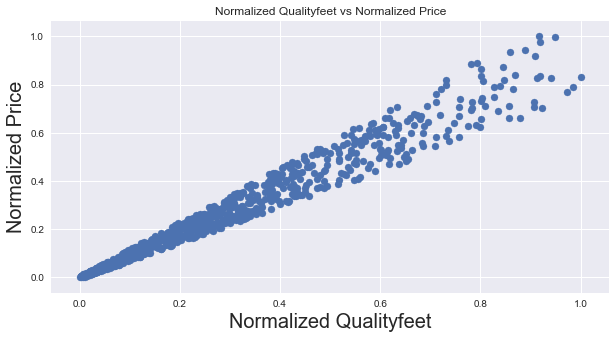

In [40]:
# Let's see how qualityfeet relate to price
plt.figure(figsize=(10,5))
plt.scatter(housing_normalized['qualityfeet'],housing_normalized['price'])
plt.xlabel('Normalized Qualityfeet', fontsize=20)
plt.ylabel('Normalized Price', fontsize=20)
plt.title('Normalized Qualityfeet vs Normalized Price')
plt.show()

Well, this looks promising. We can see a very clear trend, much more clearly than before!

Why is it so much clearer now? We looked at both variables seperately before, why wasn't it this clear?

Because looking at only one dimension compared to price at a time is always looking at an incomplete picture. Combining dimensions let us 'see the whole picture at once' (even lets us visualize more than 3 dimensions, which is literally impossible without dimension reduction).

It won't always work out this well, but sq_feet and quality were excellent candidates for combining in dimensionality reduction. Why?

1. They each had an intuitive tie to price. As each increases, so does price, so multiplying them together (taking an aggregate measure of both) preserves the nature of this directional relationship- higher aggregate, you'd expect higher price. Dividing them would not preserve this meaning and not be helpful in this scenario, though it might be useful when one variable's relative size to another variable would be a good predictor. For example body weight / height is probably a good way to combine these two seperate variables to predict obesity- because of the inherent nature of the data itself.
<br>
<br>
2. Both sq_feet and quality were each strongly correlated to price -AND- they were NOT correlated with eachother. Both part of this are very important. Each one being strongly correlated to price suggests each is good at predicting price on its own. But imagine if they were highly correlated with eachother. For example imagine if we had 'quality of neighborhood' as well. 'Quality of neighborhood' might be good on its own predicting price, but if its also highly correlated to overall 'quality', effectively the information we get from 'quality of neighborhood' is already captured/expressed by 'quality', so combining these two variables doesn't tell us anything new, and in fact 'double counts' repeated information. Since in this case 'sq_feet' and 'quality' were uncorrelated, they were excellent candidates for combining, because they each added a seperate piece of information to the puzzle, so that when we looked at them combined (viewing 2 pieces of puzzle at once) rather one at a time (2 seperate views of 1 piece of puzzle seperately) the relationship became clear.

Here, the relationship looks pretty close to 1:1.

In [41]:
def predict(df):
    df['predicted_price'] = 1 * df['qualityfeet']
    return df

predict(housing_normalized).head()

,price,sq_feet,quality,qualityfeet,predicted_price
0,0.122065,0.198874,0.373737,0.137733,0.137733
1,0.074800,0.125704,0.292929,0.090128,0.090128
2,0.200007,0.310194,0.404040,0.186357,0.186357
3,0.046607,0.013133,0.181818,0.038526,0.038526
4,0.116119,0.094434,0.484848,0.136267,0.136267


In [42]:
predict_housing = denormalize(housing_normalized, housing)
predict_housing.head()

,predicted_price,price,quality,qualityfeet,sq_feet
0,34243.035140,30992.64,38.0,27284.0,718.0
1,24367.331436,21187.60,30.0,18030.0,601.0
2,44330.040913,47161.68,41.0,36736.0,896.0
3,13662.427193,15338.82,19.0,7999.0,421.0
4,33938.888225,29759.07,49.0,26999.0,551.0


In [43]:
MSE(predict_housing)

91432843024.06847

First error (only quality): 711,292,584,495 (711 billion)

Second error (avg quality and price): 562,328,961,854 (526 billion)

Third error (weighted avg quality and price): 529,337,593,438 (529 billion)
    
Fourth error (dimenions reduced w/ qualityfeet):  91,432,843,024 (91 billion)

Our model improved yet again! This time by much, much more than previously!

### Recap, our final algorithm is:
1. Import data
2. Clean data, function: clean(df)
3. Manually explore the data
4. Normalize data, function: normalize(df)
5. Generate a prediction, function: predict(df)
6. Denormalize data, function: denormalize(norm_df, df)
7. Calculate error, function: MSE(df)
8. Manually consider ways to improve the model, implement changes, and repeat 1-7
    - if changes improve the model keep them
    - if changes make the model worse, throw them out
    

### How this relates to Machine Learning
    
For machine learning you will still need to:
1. import data and the right dependencies
2. clean and pre-process your data
3. normalize/standardize your data
4. manually explore data to assess which ML model is right to use
5. run your ML model
6. denormalize data
7. assess model's accuracy
8. consider alternative ways to further refine and improve results

So you see, we are learning the exact same steps required for machine learning, and also building the intuition of how algorithms and predictions work, which will make it easier to understand how ML algos work, and why they do what they do what they do.

## 4.0 Using Custom Algorithms to Predict More Complex Data Sets

Now that we've got the basics down, let's practice with some additional complications you will see in real world data sets, and which you will need to overcome to use machine learning
- non-quantitative columns
- non-linear relationships

In [61]:
# Let's start from scratch, first we import dependencies and data...
import pandas as pd
rentals = pd.read_csv('bike_rentals.csv')
rentals.head()

,rentals,day_of_week,season,holiday,temp,humidity
0,109,Monday,Spring,0,21,0.500
1,45,Tuesday,Spring,1,25,0.414
2,63,Wednesday,Spring,0,15,0.352
3,105,Thursday,Spring,0,26,0.305
4,20,Friday,Spring,1,10,0.236


In [62]:
# Next, we need to clean and pre-process data

def clean(df):
    df = df.dropna(how='any')
    df.apply(pd.to_numeric, errors='ignore')
    return df
clean(rentals)

seasons = pd.get_dummies(rentals['season'])
seasons.head()

rentals = pd.concat([rentals, seasons], axis=1)
rentals.head()


,rentals,day_of_week,season,holiday,temp,humidity,Fall,Spring,Summer,Winter
0,109,Monday,Spring,0,21,0.500,0,1,0,0
1,45,Tuesday,Spring,1,25,0.414,0,1,0,0
2,63,Wednesday,Spring,0,15,0.352,0,1,0,0
3,105,Thursday,Spring,0,26,0.305,0,1,0,0
4,20,Friday,Spring,1,10,0.236,0,1,0,0


In [63]:
# day_of_week Probably what is more useful is weekday/weekend

def weekend(x):
    if (x == 'Saturday' or x == 'Sunday'):
        return 1
    else:
        return 0
    
rentals['weekend'] = rentals['day_of_week'].apply(lambda x: weekend(x))

rentals.head(8)

,rentals,day_of_week,season,holiday,temp,humidity,Fall,Spring,Summer,Winter,weekend
0,109,Monday,Spring,0,21,0.500,0,1,0,0,0
1,45,Tuesday,Spring,1,25,0.414,0,1,0,0,0
2,63,Wednesday,Spring,0,15,0.352,0,1,0,0,0
3,105,Thursday,Spring,0,26,0.305,0,1,0,0,0
4,20,Friday,Spring,1,10,0.236,0,1,0,0,0
5,113,Saturday,Spring,0,19,0.279,0,1,0,0,1
6,186,Sunday,Spring,0,25,0.321,0,1,0,0,1
7,129,Monday,Spring,0,25,0.231,0,1,0,0,0


In [64]:
# Ok, we've cleaned and preprocessed data, now let's normalize

# This times its a bit more complex since we have some columns like day_of_week we cant normalize

columns_to_norm = rentals[['rentals', 'temp', 'humidity']]
columns_to_keep = rentals.drop(['rentals', 'temp', 'humidity'],axis=1)

columns_to_keep.head()

,day_of_week,season,holiday,Fall,Spring,Summer,Winter,weekend
0,Monday,Spring,0,0,1,0,0,0
1,Tuesday,Spring,1,0,1,0,0,0
2,Wednesday,Spring,0,0,1,0,0,0
3,Thursday,Spring,0,0,1,0,0,0
4,Friday,Spring,1,0,1,0,0,0


In [65]:
def normalize(df):
    df_norm = df
    df_norm -= df_norm.min()
    df_norm /= df_norm.max() - df_norm.min()
    return df_norm

rentals_norm = pd.concat([normalize(columns_to_norm), columns_to_keep], axis=1)
rentals_norm.head(7)

,rentals,temp,humidity,day_of_week,season,holiday,Fall,Spring,Summer,Winter,weekend
0,0.429134,0.52,0.464668,Monday,Spring,0,0,1,0,0,0
1,0.177165,0.60,0.372591,Tuesday,Spring,1,0,1,0,0,0
2,0.248031,0.40,0.306210,Wednesday,Spring,0,0,1,0,0,0
3,0.413386,0.62,0.255889,Thursday,Spring,0,0,1,0,0,0
4,0.078740,0.30,0.182013,Friday,Spring,1,0,1,0,0,0
5,0.444882,0.48,0.228051,Saturday,Spring,0,0,1,0,0,1
6,0.732283,0.60,0.273019,Sunday,Spring,0,0,1,0,0,1


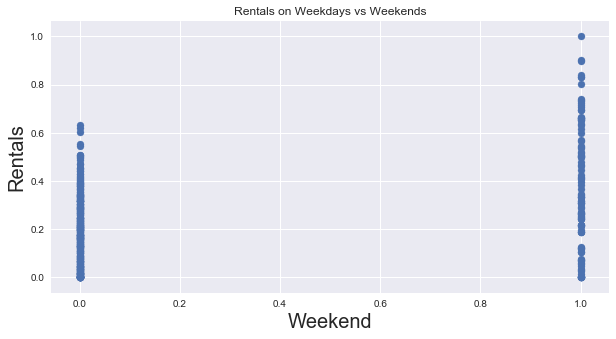

In [66]:
# Now we can manually explore the data, let's start with looking at the impact of the weekend
plt.figure(figsize=(10,5))
plt.scatter(rentals_norm['weekend'],rentals_norm['rentals'])
plt.xlabel('Weekend', fontsize=20)
plt.ylabel('Rentals', fontsize=20)
plt.title('Rentals on Weekdays vs Weekends')
plt.show()

In [69]:
# Not super helpful for a binary 0 or 1 case, maybe just the average in each case
rentals_norm.groupby('weekend', as_index=False)['rentals'].mean()

,weekend,rentals
0,0,0.197093
1,1,0.376779


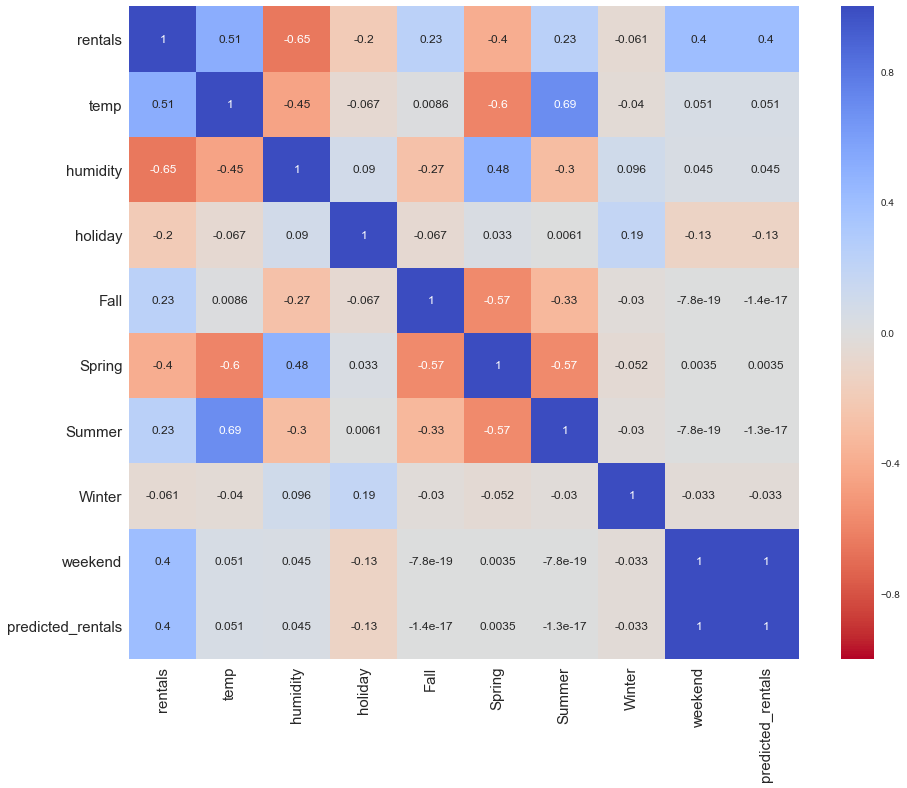

In [72]:
# It looks like the weekend has a strong impact, on average almost doubling the number of predicted rentals

# let's also look at some correlation

correlations_map= rentals_norm.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlations_map,annot=True,cbar=True,cmap="coolwarm_r")
plt.xticks(rotation=90,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.show()

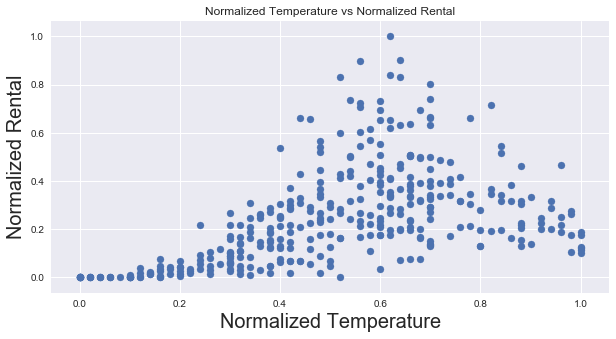

In [98]:
rentals_norm['wintertemp'] = rentals_norm['Winter'] * rentals_norm['temp']

plt.figure(figsize=(10,5))
plt.scatter(rentals_norm['temp'],rentals_norm['rentals'])
plt.xlabel('Normalized Temperature', fontsize=20)
plt.ylabel('Normalized Rental', fontsize=20)
plt.title('Normalized Temperature vs Normalized Rental')
plt.show()

In [94]:
# Not super helpful for a binary 0 or 1 case, maybe just the average in each case
rentals_norm.groupby('Winter', as_index=False)['rentals'].mean()

,Winter,rentals
0,0,0.249084
1,1,0.011811


In [99]:
# The rest is up to you! Let's see who can get the lowest predictive error
# Below I've given you all the code you need, and even helped with your first step in the prediction
# All you need to do is update the prediction model below

def predict(df):
    # df['predicted_rentals'] = 0.197093 + ( (0.376779 - 0.197093) * df['weekend'] )
    weekend = 0.197093 + ( (0.376779 - 0.197093) * df['weekend'] )
    temperature = 0.6 - abs(0.6 - df['temp'])
    
    df['predicted_rentals'] = (weekend + temperature) / 2
    
    
    
    #df['predicted_rentals'] = df['predicted_rentals'] / 2
    df.apply(pd.to_numeric, errors='ignore')
    return df

predict(rentals_norm).head(7)

,rentals,temp,humidity,day_of_week,season,holiday,Fall,Spring,Summer,Winter,weekend,predicted_rentals,wintertemp
0,0.429134,0.52,0.464668,Monday,Spring,0,0,1,0,0,0,0.358546,0.0
1,0.177165,0.60,0.372591,Tuesday,Spring,1,0,1,0,0,0,0.398546,0.0
2,0.248031,0.40,0.306210,Wednesday,Spring,0,0,1,0,0,0,0.298546,0.0
3,0.413386,0.62,0.255889,Thursday,Spring,0,0,1,0,0,0,0.388546,0.0
4,0.078740,0.30,0.182013,Friday,Spring,1,0,1,0,0,0,0.248547,0.0
5,0.444882,0.48,0.228051,Saturday,Spring,0,0,1,0,0,1,0.428389,0.0
6,0.732283,0.60,0.273019,Sunday,Spring,0,0,1,0,0,1,0.488389,0.0


In [100]:
columns_to_denorm = rentals_norm[['rentals', 'temp', 'humidity', 'predicted_rentals']]
columns_to_keep = rentals_norm.drop(['rentals', 'temp', 'humidity', 'predicted_rentals'],axis=1)

def denormalize(norm_df, df):
    x = ( norm_df['predicted_rentals'] * ( df['rentals'].max() - df['rentals'].min() ) ) + df['rentals'].min()
    norm_df = ( norm_df * ( df.max() - df.min() ) ) + df.min()
    norm_df['predicted_rentals'] = x
    return norm_df

rentals = pd.concat([denormalize(columns_to_denorm, rentals[['rentals','temp', 'humidity']]), columns_to_keep], axis=1)
rentals.head(7)

,humidity,predicted_rentals,rentals,temp,day_of_week,season,holiday,Fall,Spring,Summer,Winter,weekend,wintertemp
0,0.500,91.070811,109.0,21.0,Monday,Spring,0,0,1,0,0,0,0.0
1,0.414,101.230811,45.0,25.0,Tuesday,Spring,1,0,1,0,0,0,0.0
2,0.352,75.830811,63.0,15.0,Wednesday,Spring,0,0,1,0,0,0,0.0
3,0.305,98.690811,105.0,26.0,Thursday,Spring,0,0,1,0,0,0,0.0
4,0.236,63.130811,20.0,10.0,Friday,Spring,1,0,1,0,0,0,0.0
5,0.279,108.810933,113.0,19.0,Saturday,Spring,0,0,1,0,0,1,0.0
6,0.321,124.050933,186.0,25.0,Sunday,Spring,0,0,1,0,0,1,0.0


In [101]:
# For simplicitly let's forget about denormalizing, we can still compare RELATIVE errors on normalized values
# Try to see how much you can improve the error by over the model which only uses 'weekend' to predict rentals
def MSE(df):
    df['error'] = (df['predicted_rentals'] - df['rentals']) ** 2
    return df['error'].sum()

MSE(rentals)


650017.0000828184